### Explore data:
- Languages
- Alphabets
- Number of characters
- Type of variants
- ...

### Create class to store data

In [8]:
class Pair():
    def __init__(self, s1, s2, label, s1_alphabet, s2_alphabet):
        self.s1 = s1.strip()
        self.s2 = s2.strip()
        self.label = label.strip()
        self.s1_alphabet = s1_alphabet.strip()
        self.s2_alphabet = s2_alphabet.strip()
        self.is_same_alphabet = (self.s1_alphabet == self.s2_alphabet)
        self.diff_character = abs(len(self.s1) - len(self.s2))
        self.has_initial_name = self.check_initial_name()

    # for LATIN only
    def check_initial_name(self):
        if (self.s1_alphabet == "LATIN"):
            s1_split = self.s1.split(" ")
            for x in s1_split:
                if (len(x) == 2 and x[1] == '.'):
                    return True
        if (self.s2_alphabet == "LATIN"):
            s2_split = self.s2.split(" ")
            for x in s2_split:
                if (len(x) == 2 and x[1] == '.'):
                    return True
        return False


In [9]:
class Object():
    def __init__(self):
        self.n_true = 0
        self.n_false = 0
    
    def add(self, label_type):
        if (label_type=="TRUE"): self.n_true = self.n_true + 1
        else: self.n_false = self.n_false + 1

    def get_total(self):
        return self.n_true + self.n_false 
    
    def output_string(self):
        s = str(self.get_total()) + "   True: " + str(self.n_true) + "   False: " + str(self.n_false)
        return s


In [65]:
class ListOfPair():
    def __init__(self, input_path):
        self.list_pair = self.get_pair_list(input_path)
        self.list_alphabet = self.get_alphabet_list() 
    
    def get_pair_list(self, input_path):
        list_pair = []
        with open(input_path, "r", encoding="utf-8") as f:
            while(True):
                line = f.readline() # line = s1|s2|label|s1_id|s2_id|s1_alphabet|s2_alphabet
                if (line == ""): break
                line_split = line.split("\t")
                s1, s2, label = line_split[0], line_split[1], line_split[2]
                s1_alphabet, s2_alphabet = line_split[-2], line_split[-1]
                list_pair.append(Pair(s1, s2, label, s1_alphabet, s2_alphabet))
        return list_pair
    
    def get_alphabet_list(self):
        list_alphabet = set()
        for pair in self.list_pair:
            list_alphabet.add(pair.s1_alphabet)
            list_alphabet.add(pair.s2_alphabet)
        return list(list_alphabet)

    def count_same_diff_alphabet(self):
        result = {"Same": Object(), "Diff": Object()}
        for pair in self.list_pair:
            if pair.is_same_alphabet:
                result["Same"].add(pair.label)
            else: result["Diff"].add(pair.label)
        return result

    def count_pair_same_alphabet(self):
        result = {}
        for alphabet in self.list_alphabet:
            result[alphabet] = Object()
        for pair in self.list_pair:
            if (pair.is_same_alphabet):
                result[pair.s1_alphabet].add(pair.label)
        return sorted(result.items(), key=lambda kv: kv[1].get_total(), reverse=True) # sort descending by value

    def count_each_alphabet_occurence(self):
        result = {}
        for alphabet in self.list_alphabet:
            result[alphabet] = Object()
        for pair in self.list_pair:
            if (pair.is_same_alphabet):
                result[pair.s1_alphabet].add(pair.label)
            else:
                if (pair.s1_alphabet != "LATIN"):
                    result[pair.s1_alphabet].add(pair.label)
                if (pair.s2_alphabet != "LATIN"):
                    result[pair.s2_alphabet].add(pair.label)
        return sorted(result.items(), key=lambda kv: kv[1].get_total(), reverse=True) # sort descending by value

    def count_different_character(self):
        result = {}
        for pair in self.list_pair:
            if (pair.diff_character not in result):
                result[pair.diff_character] = Object()
            result[pair.diff_character].add(pair.label)
        return sorted(result.items()) 
    
    def count_initial(self):
        result = Object()
        for pair in self.list_pair:
            if pair.has_initial_name:
                result.add(pair.label)
        return result

    def analyze(self):
        print("Number of pairs:", len(self.list_pair))
        print("Number of alphabets:", len(self.list_alphabet))
        print(self.list_alphabet)

        print("\nNumber of pairs has the Same and Different alphabet:")
        result = self.count_same_diff_alphabet()
        for x in result:
            print("---", x, result[x].output_string())
        
        print("\nDistribution in pairs has the Same alphabet:")
        pair_same_alphabet = self.count_pair_same_alphabet()
        for x in pair_same_alphabet:
            if (x[1].get_total() > 0):
                print("---", x[0], x[1].output_string())
        
        print("\nNumber of pair has the occurence of:")
        each_alphabet_occurence = self.count_each_alphabet_occurence()
        for x in each_alphabet_occurence:
            if (x[1].get_total() > 0):
                print("---", x[0], x[1].output_string())
        n_true, n_false, index = "", "", ""
        for x in each_alphabet_occurence:
            index = index + ", \"" + x[0] + "\""
            n_true = n_true + ", " + str(x[1].n_true)
            n_false = n_false + ", " + str(x[1].n_false)
        print("index = [", index[1:], "]")
        print("n_true = [", n_true[1:], "]")
        print("n_false = [", n_false[1:], "]")

        print("\nNumber of different characters in pairs:")
        character_diff = self.count_different_character()
        for x in character_diff:
            if (x[1].get_total() > 0):
                print("---", x[0], x[1].output_string())
        n_true, n_false, index = "", "", ""
        for x in character_diff:
            index = index + ", \"" + str(x[0]) + "\""
            n_true = n_true + ", " + str(x[1].n_true)
            n_false = n_false + ", " + str(x[1].n_false)
        print("index = [", index[1:], "]")
        print("n_true = [", n_true[1:], "]")
        print("n_false = [", n_false[1:], "]")

        print("\nNumber of pairs has initial name (LATIN only):")
        initial = self.count_initial()
        print(initial.output_string())

### Start exploring dataset

In [79]:
toponym_path = "./dataset/toponym.txt"
ulan_path = "./dataset/ulan.txt"
wikidata_path = "./dataset/wikidata.txt"

pair_list = ListOfPair(wikidata_path)
pair_list.analyze()

Number of pairs: 93416
Number of alphabets: 33
['CJK', 'KATAKANA-HIRAGANA', 'HIRAGANA', 'DEVANAGARI', 'MONGOLIAN', 'BENGALI', 'ARMENIAN', 'KHMER', 'GURMUKHI', 'KANNADA', 'MALAYALAM', 'CYRILLIC', 'TIBETAN', 'MYANMAR', 'GREEK', 'GEORGIAN', 'ETHIOPIC', 'SINHALA', 'NKO', 'UND', 'HANGUL', 'GUJARATI', 'LATIN', 'LAO', 'TAMIL', 'ORIYA', 'MODIFIER', 'TELUGU', 'HEBREW', 'THAI', 'SYRIAC', 'KATAKANA', 'ARABIC']

Number of pairs has the Same and Different alphabet:
--- Same 63309   True: 29993   False: 33316
--- Diff 30107   True: 16716   False: 13391

Distribution in pairs has the Same alphabet:
--- LATIN 58329   True: 27621   False: 30708
--- CYRILLIC 3791   True: 1501   False: 2290
--- CJK 645   True: 478   False: 167
--- ARABIC 140   True: 93   False: 47
--- HANGUL 110   True: 78   False: 32
--- HEBREW 70   True: 50   False: 20
--- THAI 54   True: 38   False: 16
--- KATAKANA-HIRAGANA 53   True: 42   False: 11
--- KATAKANA 24   True: 20   False: 4
--- HIRAGANA 20   True: 12   False: 8
--- GREEK 

### Plot

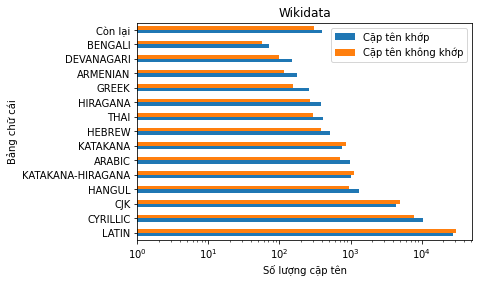

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

index =  ["LATIN", "CYRILLIC", "CJK", "HANGUL", "KATAKANA-HIRAGANA", "ARABIC", "KATAKANA", "HEBREW", "THAI", "HIRAGANA", "GREEK", "ARMENIAN", "DEVANAGARI", "BENGALI", "Còn lại"]
n_true =  [ 27621, 10420, 4327, 1335, 1008, 993, 753, 512, 413, 384, 260, 177, 151, 71, 398]
n_false =  [30708, 7877, 4948, 952, 1130, 707, 853, 379, 297, 265, 155, 114, 99, 55, 301]
  
df = pd.DataFrame({'Cặp tên khớp': n_true,
                    'Cặp tên không khớp': n_false}, index=index)
ax = df.plot.barh(log=True)

plt.xlabel("Số lượng cặp tên")
plt.ylabel("Bảng chữ cái")
plt.title("Wikidata")
#plt.savefig('different-alphabet-distribution-bar-wikidata.png', bbox_inches = 'tight')
plt.show()

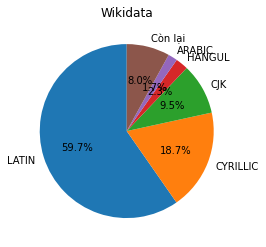

In [60]:
index =  ["LATIN", "CYRILLIC", "CJK", "HANGUL", "ARABIC", "Còn lại"]
n_true =  np.array([ 27621, 10420, 4327, 1335, 993, 4180])
n_false =  np.array([30708, 7877, 4948, 952, 707, 3652])
total = n_true + n_false
plt.pie(total, labels = index, autopct='%1.1f%%', startangle = 90)
plt.title("Wikidata")
#plt.savefig('different-alphabet-distribution-pie-wikidata.png', bbox_inches = 'tight')
plt.show() 

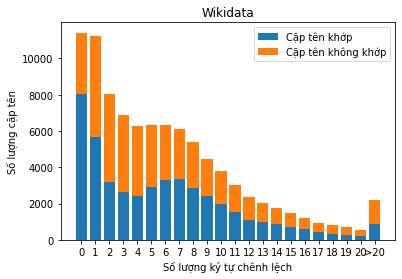

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

index = [  "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", ">20" ]
n_true = [  8064, 5662, 3162, 2640, 2426, 2934, 3288, 3333, 2875, 2413, 1955, 1522, 1105, 992, 891, 705, 574, 428, 340, 291, 218, 891]
n_false = [  3357, 5594, 4888, 4270, 3865, 3373, 3035, 2769, 2523, 2055, 1820, 1521, 1264, 1062, 869, 779, 655, 521, 458, 388, 325,1316 ]

fig, ax = plt.subplots()
ax.bar(index, n_true, label='Cặp tên khớp')
ax.bar(index, n_false, bottom=n_true,
       label='Cặp tên không khớp')

ax.set_xlabel("Số lượng ký tự chênh lệch")
ax.set_ylabel("Số lượng cặp tên")
ax.set_title("Wikidata")
ax.legend()
#plt.savefig('different-character-distribution-wikidata.png', bbox_inches = 'tight')
plt.show()

In [81]:
a = np.array([233, 222, 162, 129, 106, 77, 65, 66, 45, 35, 31, 23, 17, 16, 16, 8, 11, 0, 9, 0, 4, 3, 4, 3, 2, 4, 3, 3, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0  ])
sum(a)

1316

### Average charaters in name

In [1]:
def cal_average_characters(input_path):
    with open(input_path, "r", encoding="utf-8") as f:
        sum = 0
        count = 0
        while(True):
            line = f.readline() # line = s1|s2|label|s1_id|s2_id|s1_alphabet|s2_alphabet
            if (line == ""): break
            line_split = line.split("\t")
            sum = sum + len(line_split[0])
            sum = sum + len(line_split[1])
            count = count + 2
    return sum/count
    
print("Average characters")
print("Toponym: ", cal_average_characters("./dataset/toponym.txt"))
print("ULAN: ", cal_average_characters("./dataset/ulan.txt"))
print("Wikidata: ", cal_average_characters("./dataset/wikidata.txt"))


Average characters
Toponym:  11.3610241
ULAN:  16.928424034281704
Wikidata:  14.264258799349149
